In [2]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
import lmfit
from lmfit.models import LinearModel, LorentzianModel

In [3]:
def voigt1(x,s1,g1,o1,scale1):
    return scale1*scipy.special.voigt_profile(x-o1,s1,g1)#+a*x**2+b
def voigt2(x,s1,s2,g1,g2,o1,o2,scale1,scale2):
    return scale1*scipy.special.voigt_profile(x-o1,s1,g1)+scale2*scipy.special.voigt_profile(x-o2,s2,g2)#+a*x**2+b

In [4]:
path =  'Data/SI_111_30_15.xy'
with open(path) as tf:
    data = np.loadtxt(tf,delimiter=" ").T

err = np.zeros(len(data[1]))
for i in range(len(err)):
    err[i] = (data[1,i])**0.5
data = np.vstack([data,err])

zu betrachtende intervalle:  
b1[25,26]->[667,733]  
a1[28,29]->[867,933]  
b2[52.4,53]->[2493,2533]  
a2[58.5,59.25]->[2900,2950]  
b3[83,84]->[4533,4600]  
a3[93,97]->[5200,5467]  5300:5367

In [5]:
for i in range(len(data[0])):
    if data[0,i]>=95.5:
        print(i)
        break

5367


In [6]:
#modell erstellen b1[25,26]->[667,733] 
model_voigt = lmfit.model.Model(voigt1)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
#pars_voigt["a"].set(0.1)
#pars_voigt["b"].set(20)
pars_voigt["o1"].set(value=25.6,min=25.5,max=25.75)
pars_voigt["scale1"].set(7000)

#Fitten
out_voigt = model_voigt.fit(data[1,667:733],x=data[0,667:733],params=pars_voigt,weights=1/data[2,667:733],nan_policy='propagate')
b1f=out_voigt.fit_report()
b1p=np.array([np.arange(25,26,0.001),out_voigt.eval(x=np.arange(25,26,0.001))])

In [7]:
#modell erstellen a1[28,29]->[867,933]  
model_voigt = lmfit.model.Model(voigt2)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
pars_voigt["s2"].set(value=0.0147,min=0,max=1)
pars_voigt["g2"].set(value=0.0147,min=0,max=1)
#pars_voigt["a"].set(0.1)
#pars_voigt["b"].set(20)
pars_voigt["o1"].set(value=28.4,min=28,max=29)
pars_voigt["o2"].set(value=28.5,min=28,max=29)
pars_voigt["scale1"].set(25000)
pars_voigt["scale2"].set(15000)
 
#Fitten
out_voigt = model_voigt.fit(data[1,867:933],x=data[0,867:933],params=pars_voigt,weights=1/data[2,867:933],nan_policy='propagate')
a1f=out_voigt.fit_report()
a1p=np.array([np.arange(28,29,0.001),out_voigt.eval(x=np.arange(28,29,0.001))])

In [8]:
#modell erstellen b2[52.4,53]->[2493,2533] 
model_voigt = lmfit.model.Model(voigt1)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
#pars_voigt["a"].set(0.1)
#pars_voigt["b"].set(20)
pars_voigt["o1"].set(value=52.67,min=52.4,max=53)
pars_voigt["scale1"].set(100)

#Fitten
out_voigt = model_voigt.fit(data[1,2493:2533],x=data[0,2493:2533],params=pars_voigt,weights=1/data[2,2493:2533],nan_policy='propagate')
b2f=out_voigt.fit_report()
b2p=np.array([np.arange(52.4,53,0.001),out_voigt.eval(x=np.arange(52.4,53,0.001))])

In [9]:
#modell erstellen a2[58.5,59.25]->[2900,2950]2900:2950
model_voigt = lmfit.model.Model(voigt2)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
pars_voigt["s2"].set(value=0.0147,min=0,max=1)
pars_voigt["g2"].set(value=0.0147,min=0,max=1)
#pars_voigt["a"].set(0.1)
#pars_voigt["b"].set(20)
pars_voigt["o1"].set(value=58.6,min=58.5,max=59.25)
pars_voigt["o2"].set(value=59,min=58.5,max=59.25)
pars_voigt["scale1"].set(25000)
pars_voigt["scale2"].set(15000)
 
#Fitten
out_voigt = model_voigt.fit(data[1,2900:2950],x=data[0,2900:2950],params=pars_voigt,weights=1/data[2,2900:2950],nan_policy='propagate')
a2f=out_voigt.fit_report()
a2p=np.array([np.arange(58.5,59.25,0.001),out_voigt.eval(x=np.arange(58.5,59.25,0.001))])

In [10]:
#modell erstellen b3[83,84]->[4533,4600]
model_voigt = lmfit.model.Model(voigt1)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
#pars_voigt["a"].set(0.1)
#pars_voigt["b"].set(20)
pars_voigt["o1"].set(value=83.5,min=83,max=84)
pars_voigt["scale1"].set(100)

#Fitten
out_voigt = model_voigt.fit(data[1,4533:4600],x=data[0,4533:4600],params=pars_voigt,weights=1/data[2,4533:4600],nan_policy='propagate')
b3f=out_voigt.fit_report()
b3p=np.array([np.arange(83,84,0.001),out_voigt.eval(x=np.arange(83,84,0.001))])

In [11]:
#modell erstellen a3[93,97]->[5200,5467]  
model_voigt = lmfit.model.Model(voigt2)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
pars_voigt["s2"].set(value=0.0147,min=0,max=1)
pars_voigt["g2"].set(value=0.0147,min=0,max=1)
#pars_voigt["a"].set(0.1)
#pars_voigt["b"].set(20)
pars_voigt["o1"].set(value=94.9,min=93,max=97)
pars_voigt["o2"].set(value=95.3,min=93,max=97)
pars_voigt["scale1"].set(25000)
pars_voigt["scale2"].set(15000)
 
#Fitten
out_voigt = model_voigt.fit(data[1,5200:5467],x=data[0,5200:5467],params=pars_voigt,weights=1/data[2,5200:5467],nan_policy='propagate')
a3f=out_voigt.fit_report()
a3p=np.array([np.arange(94.5,95.5,0.001),out_voigt.eval(x=np.arange(94.5,95.5,0.001))])

Text(0.5, 0, '2$\\theta$')

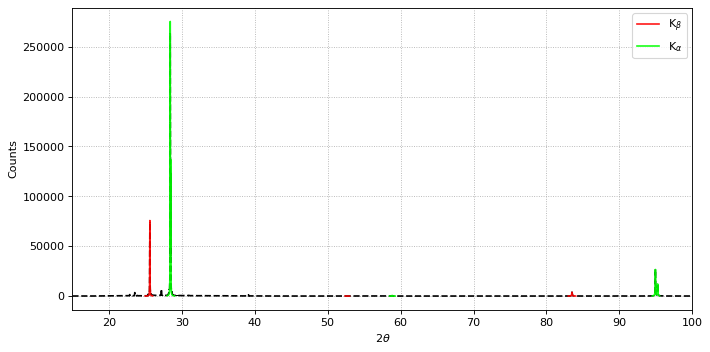

In [14]:

fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
plt.errorbar(data[0],data[1],yerr=data[2],zorder=5,mfc='black',color='k',linestyle='--')
plt.plot(b1p[0],b1p[1],zorder=10,label='K'r'$_\beta$',color='r',alpha=0.9)
plt.plot(a1p[0],a1p[1],zorder=10,label='K'r'$_\alpha$',color='lime',alpha=0.9)
plt.plot(b2p[0],b2p[1],zorder=10,color='r',alpha=0.9)
plt.plot(a2p[0],a2p[1],zorder=10,color='lime',alpha=0.9)
plt.plot(b3p[0],b3p[1],zorder=10,color='r',alpha=0.9)
plt.plot(a3p[0],a3p[1],zorder=10,color='lime',alpha=0.9)

plt.legend()
plt.grid(axis='both',linestyle=':')
plt.xlim(15,100)
plt.ylabel("Counts")
plt.xlabel("2"r"$\theta$")


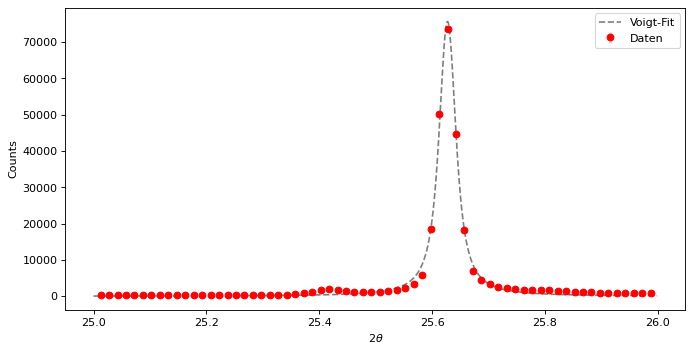

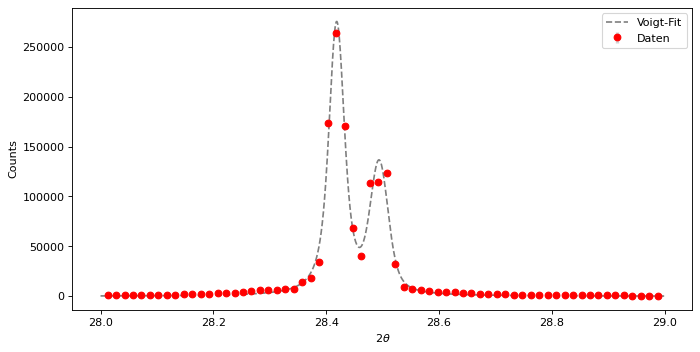

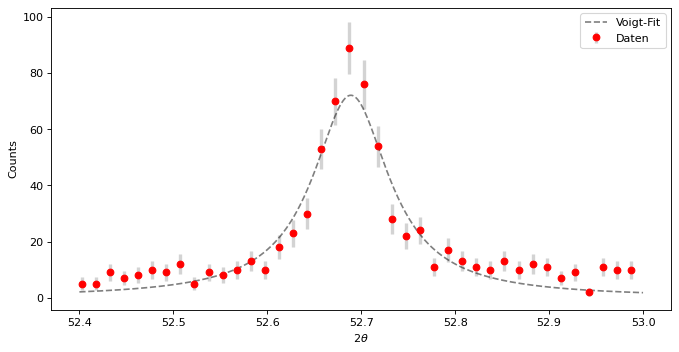

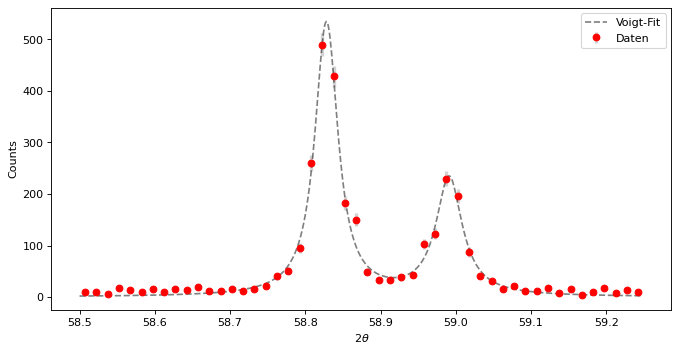

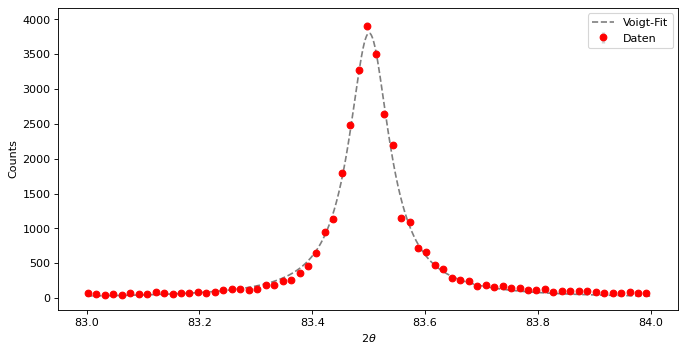

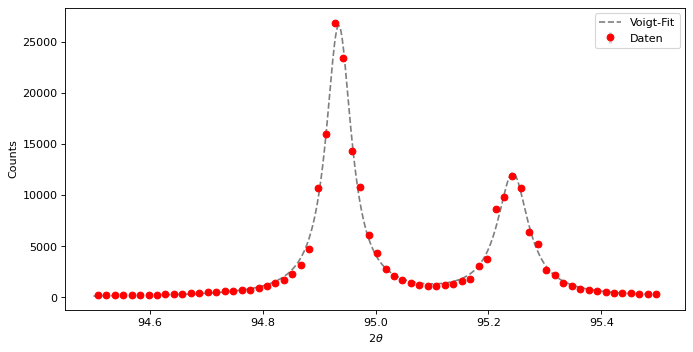

In [13]:
#plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
plt.errorbar(data[0,667:733],data[1,667:733],yerr=data[2,667:733],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=10,label="Daten")
plt.plot(b1p[0],b1p[1],zorder=10,color='k',linestyle='--',alpha=0.5,label="Voigt-Fit")
plt.ylabel("Counts")
plt.xlabel("2"r"$\theta$")
plt.legend()


fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
plt.errorbar(data[0,867:933],data[1,867:933],yerr=data[2,867:933],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=10,label="Daten")
plt.plot(a1p[0],a1p[1],zorder=10,color='k',linestyle='--',alpha=0.5,label="Voigt-Fit")
plt.ylabel("Counts")
plt.xlabel("2"r"$\theta$")
plt.legend()


fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
plt.errorbar(data[0,2493:2533],data[1,2493:2533],yerr=data[2,2493:2533],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=10,label="Daten")
plt.plot(b2p[0],b2p[1],zorder=10,color='k',linestyle='--',alpha=0.5,label="Voigt-Fit")
plt.ylabel("Counts")
plt.xlabel("2"r"$\theta$")
plt.legend()


fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
plt.errorbar(data[0,2900:2950],data[1,2900:2950],yerr=data[2,2900:2950],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=10,label="Daten")
plt.plot(a2p[0],a2p[1],zorder=10,color='k',linestyle='--',alpha=0.5,label="Voigt-Fit")
plt.ylabel("Counts")
plt.xlabel("2"r"$\theta$")
plt.legend()


fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
plt.errorbar(data[0,4533:4600],data[1,4533:4600],yerr=data[2,4533:4600],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=10,label="Daten")
plt.plot(b3p[0],b3p[1],zorder=10,color='k',linestyle='--',alpha=0.5,label="Voigt-Fit")
plt.ylabel("Counts")
plt.xlabel("2"r"$\theta$")
plt.legend()


fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
plt.errorbar(data[0,5300:5367],data[1,5300:5367],yerr=data[2,5300:5367],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=10,label="Daten")
plt.plot(a3p[0],a3p[1],zorder=10,color='k',linestyle='--',alpha=0.5,label="Voigt-Fit")
plt.ylabel("Counts")
plt.xlabel("2"r"$\theta$")
plt.legend()